In [ ]:
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import predict

dataset=pd.read_csv('SolarRadiationPrediction.csv',engine='python',nrows=576*15)
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,8,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,22020,67080
1,310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,22020,67080
2,1206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,22020,67080
3,1505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,22020,67080
4,1809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,22020,67080


In [2]:
#factor=dataset.drop("Radiation",axis=1)
dataset=dataset.drop("Data",axis=1)
dataset=dataset.drop("Time",axis=1)
# factor=factor.drop("TimeSunRise",axis=1)
# factor=factor.drop("TimeSunSet",axis=1)
target=dataset["Radiation"]
print(dataset)
#print(target.head(5))

      UNIXTime  Radiation  Temperature  Pressure  Humidity  \
0            8       2.58           51     30.43       103   
1          310       2.83           51     30.43       103   
2         1206       2.16           51     30.43       103   
3         1505       2.21           51     30.43       103   
4         1809       2.25           51     30.43       103   
...        ...        ...          ...       ...       ...   
8635     27622     160.80           53     30.45       100   
8636     27925     221.67           53     30.45       100   
8637     28223     344.90           54     30.46       100   
8638     28522     365.66           54     30.46       101   
8639     28820     355.57           55     30.46       101   

      WindDirection(Degrees)  Speed  TimeSunRise  TimeSunSet  
0                      77.27  11.25        22020       67080  
1                     153.44   9.00        22020       67080  
2                     142.04   7.87        22020       67080  
3  

In [3]:
dataset=dataset.values
target=target.values

In [4]:
# factor=factor.astype(int)
# pre_data=pre_data.astype(int)

In [5]:
dataset[:,1]=dataset[:,8]
dataset[:,8]=target[:]
#print(dataset[0,:])
# print(temp1)
# print(temp2)
#target=target.values
#target=target.values

In [6]:
def create_dataset(dataset,look_back):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back-1):
        #a=dataset第0行i~i+look_back個
        a=dataset[i:(i+look_back),0:9]
        dataX.append(a)
        dataY.append(dataset[i+look_back,8])
    return np.array(dataX),np.array(dataY)

    

In [7]:
train_size=int(len(dataset)*0.67)
test_size=len(dataset)- train_size
train,test=dataset[0:train_size,:],dataset[train_size:len(dataset),:]

# print(x_train[0:5])
# print(x_test[0:5])
#print(y[0:5])

# print(y_train.shape)
# print(y_test.shape)
#print(y)

In [8]:
trainX,trainY=create_dataset(train,5)
testX,testY=create_dataset(test,5)
print("train_x: ",trainX.shape)
print("train y: ",trainY.shape)
print("testX: ",testX.shape)
print(trainX[0,:,:])
print(trainY[0])

train_x:  (5782, 5, 9)
train y:  (5782,)
testX:  (2846, 5, 9)
[[8.0000e+00 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 7.7270e+01
  1.1250e+01 2.2020e+04 2.5800e+00]
 [3.1000e+02 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 1.5344e+02
  9.0000e+00 2.2020e+04 2.8300e+00]
 [1.2060e+03 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 1.4204e+02
  7.8700e+00 2.2020e+04 2.1600e+00]
 [1.5050e+03 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 1.4412e+02
  1.8000e+01 2.2020e+04 2.2100e+00]
 [1.8090e+03 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 6.7420e+01
  1.1250e+01 2.2020e+04 2.2500e+00]]
2.15


In [9]:
trainX=trainX.reshape(5782,45)
testX=testX.reshape(2846,45)
trainY=trainY.reshape(len(trainY),1)
testY=testY.reshape(len(testY),1)
print(trainX.shape)
print(trainX[0,:])

(5782, 45)
[8.0000e+00 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 7.7270e+01
 1.1250e+01 2.2020e+04 2.5800e+00 3.1000e+02 6.7080e+04 5.1000e+01
 3.0430e+01 1.0300e+02 1.5344e+02 9.0000e+00 2.2020e+04 2.8300e+00
 1.2060e+03 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 1.4204e+02
 7.8700e+00 2.2020e+04 2.1600e+00 1.5050e+03 6.7080e+04 5.1000e+01
 3.0430e+01 1.0300e+02 1.4412e+02 1.8000e+01 2.2020e+04 2.2100e+00
 1.8090e+03 6.7080e+04 5.1000e+01 3.0430e+01 1.0300e+02 6.7420e+01
 1.1250e+01 2.2020e+04 2.2500e+00]


In [10]:
np.random.seed(7)


dataset=dataset.astype('float32')
target=target.astype('float32')

scalar1=MinMaxScaler(feature_range=(0,1))
scalar2=MinMaxScaler(feature_range=(0,1))
scalar3=MinMaxScaler(feature_range=(0,1))
scalar4=MinMaxScaler(feature_range=(0,1))
#scalar_dim=dataset[:,1]

#target=dataset[:,1]
trainX=scalar1.fit_transform(trainX)
testX=scalar2.fit_transform(testX)
trainY=scalar3.fit_transform(trainY)
testY=scalar4.fit_transform(testY)
#target=target.reshape(len(target),1)
# target=scalar2.fit_transform(target)


In [11]:
clf=svm.SVR(kernel='linear',C=0.10127678320148709,epsilon= 0.029240378785064282,gamma='auto')
clf.fit(trainX,trainY)

C:\Users\wang8\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.10127678320148709, epsilon=0.029240378785064282, gamma='auto',
    kernel='linear')

In [12]:
y_pre=clf.predict(testX)
train_pre=clf.predict(trainX)


In [13]:
y_pre=np.reshape(y_pre,(len(y_pre),1))
train_pre=np.reshape(train_pre,(len(train_pre),1))

In [14]:
train_pre=scalar3.inverse_transform(train_pre)
trainY=scalar3.inverse_transform(trainY)
y_pre=scalar4.inverse_transform(y_pre)
testY=scalar4.inverse_transform(testY)


In [15]:
trainScore=math.sqrt(mean_squared_error(trainY,train_pre))
print('Train Score:%.2f RMSE'%(trainScore))
testScore=math.sqrt(mean_squared_error(testY,y_pre))
print('Test Score:%.2f RMSE'%(testScore))
MAE=mean_absolute_error(testY,y_pre)
print('Test Score:%.2f MAE'%(MAE))

Train Score:97.26 RMSE
Test Score:91.94 RMSE
Test Score:46.53 MAE


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


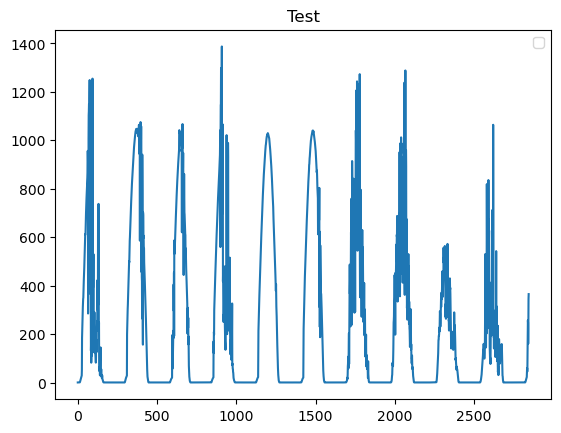

In [24]:
plt.title('Test')
plt.plot(testY)
#plt.plot(y_pre,label='Prediction(testing)')
plt.legend()
plt.show()

MAE: 46.53
RMSE: 91.94
R2 Score: 0.92
MAE: 46.53
RMSE: 91.94
R2 Score: 0.92
MAE: 46.53
RMSE: 91.94
R2 Score: 0.92


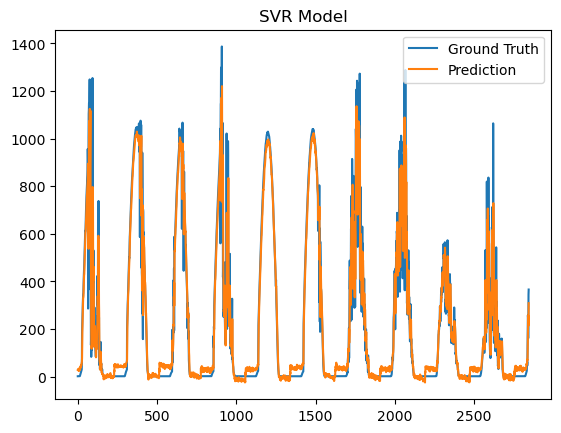

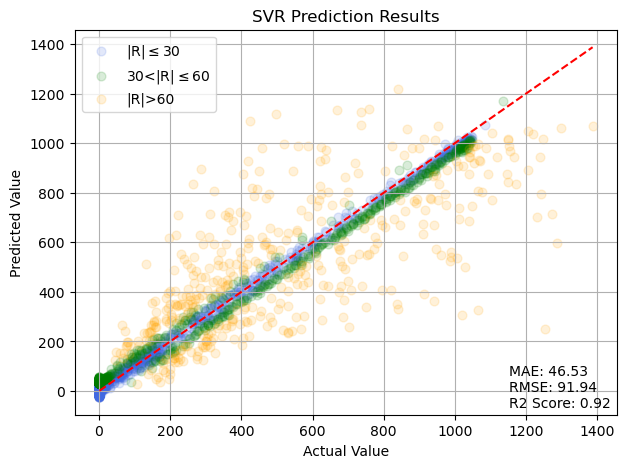

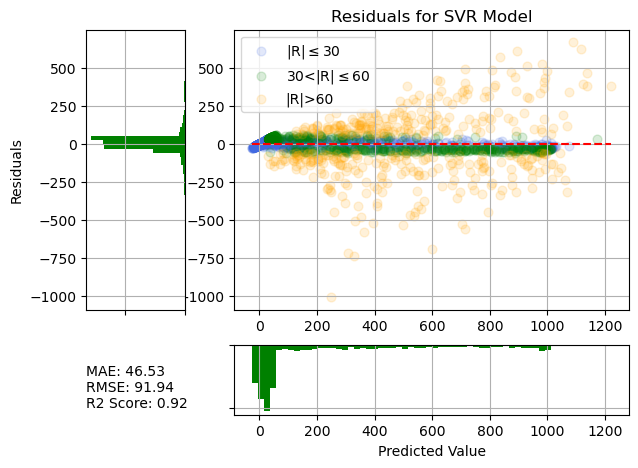

In [17]:
predict.my_self(testY,y_pre,'SVR')
predict.score_calculation(testY,y_pre)
predict.plot_pred(testY,y_pre,'SVR')
predict.plot_residuals(testY,y_pre,'SVR')